Sentiment Analysis Twitter

In [ ]:
#lib for data maniulation
import numpy as np
import pandas as pd
import re
import string

In [ ]:
#lib for  visualization
import matplotlib.pyplot 
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
#lib for text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer

In [ ]:
#lib for ml algo
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from nltk.stem import PorterStemmer as PS

In [ ]:
#lib to test accuracy
from sklearn.metrics import accuracy_score

In [ ]:
#stopword
import nltk
nltk.download ('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Dataset
dataset_columns = ['target','ids','date','flag','user','text']
data_encoding = "ISO-8859-1"
df = pd.read_csv('sa_twt_dataset.csv', encoding = data_encoding, names = dataset_columns)
df.sample(2)

,target,ids,date,flag,user,text
1140194,4,1977016373,Sat May 30 19:52:45 PDT 2009,NO_QUERY,vickybeeching,Thanks @pursuingyahweh for a great night at yo...
338950,0,2014540375,Wed Jun 03 01:52:34 PDT 2009,NO_QUERY,emmbabee,making honey joys!! yummm. hating the rain bu...


In [ ]:
#features of dataset
df.dtypes
print(np.sum(df.isnull().any(axis=1)))
print('rows',len(df),"--","columns",len(df.columns))


0
rows 1600000 -- columns 6


<AxesSubplot:title={'center':'Distribution of data'}, xlabel='target', ylabel='count'>

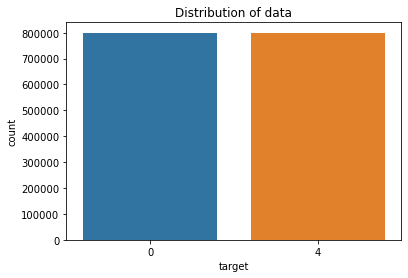

In [ ]:
#visualization
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

text, sentiment = list(df['text']), list(df['target'])

sns.countplot(x='target', data = df)

In [ ]:
#preprosessing
data = df[['text','target']]
data['target'] = data['target'].replace(4,1)
data['target'].unique()
#separat
data_p = data[data['target'] == 1]
data_n = data[data['target'] == 0]

data_p = data_p.iloc[:int(20000)]
data_n = data_n.iloc[:int(20000)]

tweets = pd.concat([data_p, data_n])

C:\Users\HP\AppData\Local\Temp/ipykernel_11036/1109874540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [ ]:
tweets['text'] = tweets['text'].str.lower
tweets['text'].tail()

19995    <bound method StringMethods.lower of <pandas.c...
19996    <bound method StringMethods.lower of <pandas.c...
19997    <bound method StringMethods.lower of <pandas.c...
19998    <bound method StringMethods.lower of <pandas.c...
19999    <bound method StringMethods.lower of <pandas.c...
Name: text, dtype: object

In [ ]:
#set of stopwords
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{'at', "you'll", 'did', 'hers', 'my', 'an', 'should', 'them', 'from', 'the', 'wasn', 'hasn', 'have', 'not', "you're", 'same', 'and', 'between', "isn't", 'just', 'this', 'it', 'down', "that'll", 'for', 'to', 'isn', 'shan', "haven't", "wasn't", 'me', 'has', 'our', "weren't", 'because', 'their', 'how', 'had', "shan't", "aren't", 'too', 'more', 'shouldn', 'with', "you'd", 'he', 'while', 'hadn', 'his', 'i', 'you', 'over', 'before', 'but', 'again', "should've", 'some', 'further', 'now', 'myself', "it's", 'herself', 'when', 'until', 'who', 'mustn', "doesn't", 'am', 'very', 'himself', 'off', 'ourselves', "needn't", 'below', 'into', 'than', 'up', 'aren', 'both', 'd', 'we', 'she', "won't", 'ours', 'that', 'such', 'weren', 'out', 'why', 'there', 'by', "wouldn't", 'ain', 'was', "didn't", 'does', 'what', "don't", "you've", 'm', 'having', 'through', 'during', 'own', 'yourself', 's', "hasn't", 'other', 'haven', 'which', 'doing', 'll', 'can', 'above', "hadn't", 'o', 'most', 'as', 'then', 'whom', 'on',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


set

In [ ]:
#stopword filteration
stopwords = set(stopwords)

def filtering_stpword(text):
    return "".join([word for word in str(text).split() if word not in stopwords])
tweets["text"] = tweets['text'].apply(lambda text: filtering_stpword(text))
tweets["text"].head()

800000    <boundmethodStringMethods.lower<pandas.core.st...
800001    <boundmethodStringMethods.lower<pandas.core.st...
800002    <boundmethodStringMethods.lower<pandas.core.st...
800003    <boundmethodStringMethods.lower<pandas.core.st...
800004    <boundmethodStringMethods.lower<pandas.core.st...
Name: text, dtype: object

In [ ]:
#punctuations filteration
eng_punc = string.punctuation
punc_list = eng_punc

def  filtering_punc(text):
    translator = str.maketrans('', '', punc_list)
    return text.translate(translator)
tweets['text'] = tweets['text'].apply(lambda x: filtering_punc(x))
tweets['text'].tail()


19995    boundmethodStringMethodslowerpandascorestrings...
19996    boundmethodStringMethodslowerpandascorestrings...
19997    boundmethodStringMethodslowerpandascorestrings...
19998    boundmethodStringMethodslowerpandascorestrings...
19999    boundmethodStringMethodslowerpandascorestrings...
Name: text, dtype: object

In [ ]:
#duplication filteration
def filtering_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
tweets['text'] = tweets['text'].apply(lambda x: filtering_repeating_char(x))
tweets['text'].tail()

19995    boundmethodStringMethodslowerpandascorestrings...
19996    boundmethodStringMethodslowerpandascorestrings...
19997    boundmethodStringMethodslowerpandascorestrings...
19998    boundmethodStringMethodslowerpandascorestrings...
19999    boundmethodStringMethodslowerpandascorestrings...
Name: text, dtype: object

In [ ]:
#URL filteration
def filtering_url(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)
tweets['text'] = tweets['text'].apply(lambda x: filtering_url(x))
tweets['text'].tail()

19995    boundmethodStringMethodslowerpandascorestrings...
19996    boundmethodStringMethodslowerpandascorestrings...
19997    boundmethodStringMethodslowerpandascorestrings...
19998    boundmethodStringMethodslowerpandascorestrings...
19999    boundmethodStringMethodslowerpandascorestrings...
Name: text, dtype: object

In [ ]:
#filtering Numeric numbers
def filtering_numbers(data):
    return re.sub('[0-9]+', '', data)
tweets['text'] = tweets['text'].apply(lambda x: filtering_numbers(x))
tweets['text'].tail()

19995    boundmethodStringMethodslowerpandascorestrings...
19996    boundmethodStringMethodslowerpandascorestrings...
19997    boundmethodStringMethodslowerpandascorestrings...
19998    boundmethodStringMethodslowerpandascorestrings...
19999    boundmethodStringMethodslowerpandascorestrings...
Name: text, dtype: object

In [ ]:
#tokenization of tweets
tokenizer = RegexpTokenizer(r'w+')
tweets['text'] = tweets['text'].apply(tokenizer.tokenize)
tweets['text'].head()

800000    [w]
800001    [w]
800002    [w]
800003    [w]
800004    [w]
Name: text, dtype: object

In [ ]:
#stemming
st = nltk.PorterStemmer()
def stemming_text(data):
    text = [st.stem(word) for word in data]
    return data
tweets['text']= tweets['text'].apply(lambda x: stemming_text(x))
tweets['text'].head()

800000    [w]
800001    [w]
800002    [w]
800003    [w]
800004    [w]
Name: text, dtype: object

In [ ]:
#limitization
lm = nltk.WordNetLemmatizer()
def lemmatizer_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
tweets['text'] = tweets['text'].apply(lambda x: lemmatizer_text(x))
tweets['text'].head()


800000    [w]
800001    [w]
800002    [w]
800003    [w]
800004    [w]
Name: text, dtype: object

In [ ]:
#vectorize tokens
def token_vectorizer(train_tf):
    vec = Tfidfvectorizer(subliner_tf=True)
    vector.fit(train_ft)
    return vec